# Intro

In this notebook, I will demonstrate the usage of a **custom built** neural network framework for **multi and binary class** classification tasks as well as for regession.
For image classification we will use the popular "*fashion_mnist_images*" dataset, which contains grayscale images of fashion items
belonging to **10** different classes. The goal is to train a neural network to **classify** these images accurately.

# Install required libraries
Since the entire framework has been built from **scratch**, only basic libraries are required for its usage.

In [1]:
# !pip install numpy
# !pip install opencv-python
# !pip install matplotlib
# !pip install urllib
# !pip install zipfile

# Dataset preparation
The following cell is responsible for downloading and extracting the fashion_mnist_images dataset,
which will be used for classification tasks. The dataset contains images of various fashion items.

In the dataset folder there are folders names from **0** to **9**, each representing a class.

![alternatvie text](https://balintdaniel.com/public/notebooks/folders.png)

- For binary classification use the other provided fownload link or simply dete calsses 2-9.
- **For regression please provide you own dataset that you wish to use. Or implement RegressionDataset class**

> NOTE: You are not obligated to use images; any other data can be
> utilized. In the case of other datasets, you need to implement the
> corresponding version of the ClassificationDataset class.


In [2]:
import os
import urllib.request
from zipfile import ZipFile

# Multi class dataset
URL = 'https://balintdaniel.com/cloud/index.php/s/ZTMfTmKyj7y5XTJ/download?path=%2Fdatasets&files=classification_dataset.zip'
FILE = 'classification_dataset.zip'

# Binary dataset
#URL = 'https://balintdaniel.com/cloud/index.php/s/ZTMfTmKyj7y5XTJ/download?path=%2Fdatasets&files=binary_classification_dataset.zip'
#FILE = 'binary_classification_dataset.zip'

# Check if the dataset file already exists in the current directory
if not os.path.isfile(FILE):
    # If the file does not exist, download it from the URL and save it as FILE
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

# Unzip the downloaded dataset file
print('Unzipping images...')
with ZipFile(FILE) as zip_images:
    zip_images.extractall("./")
print('Done!')


Unzipping images...
Done!


The cell below demonstrates the loading, augmentation, balancing, preprocessing, shuffling,
normalization, reshaping, and splitting of the image classification dataset.
**The order of the dataset function calls are important!**

In [3]:
from lib.dataset import ImageClassificationDataset

# Create an instance of the ImageClassificationDataset class
dataset = ImageClassificationDataset()

# Load the classification dataset with the specified parameters
dataset.load(
    "classification_dataset", # Multi class dataset folder name
    #"binary_classification_dataset", # Binary dataset folder name
    size=28, # Size of the images
    binary=False, # Is binary classification?
)

# Augment the dataset with additional image transformations
dataset.augment(
    # TODO
)

# Balance the dataset by adjusting the class distribution
dataset.balance(
    # TODO
)

# Preprocess the dataset by applying preprocessing techniques
dataset.preprocess(
    auto_white_balance_and_contrast=True
)

# Shuffle the dataset to randomize the order of the samples
dataset.shuffle()

# Normalize the dataset to bring the pixel values into a consistent range. (-1 1)
dataset.normalize()

# Reshape the dataset for the network to accept
dataset.reshape()

# Split the dataset into training, validation, and test sets
X_train, y_train, X_valid, y_valid, X_test, y_test = dataset.split(valid=0.2, test=0.1) # 0.2 = 20%


Train batch contains 49_402 images
Validation batch contains 14_115 images
Test batch contains 7_057 images


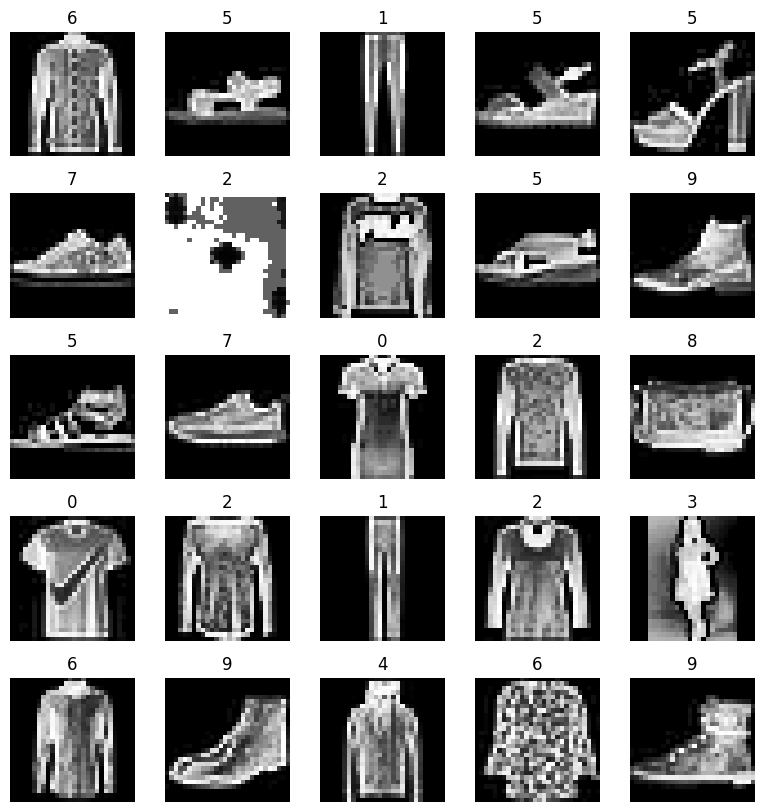

In [4]:
# Preview of the traing images
dataset.visualize_dataset_preview()

The goal of the t-SNE algorithm is to project high-dimensional data onto a lower-dimensional space while preserving the 
similarities between the data points. The method positions similar data points as close neighbors in the output space, 
while representing distant data points as distant points. Thus, t-SNE helps to reveal the structure and relationships within the data.

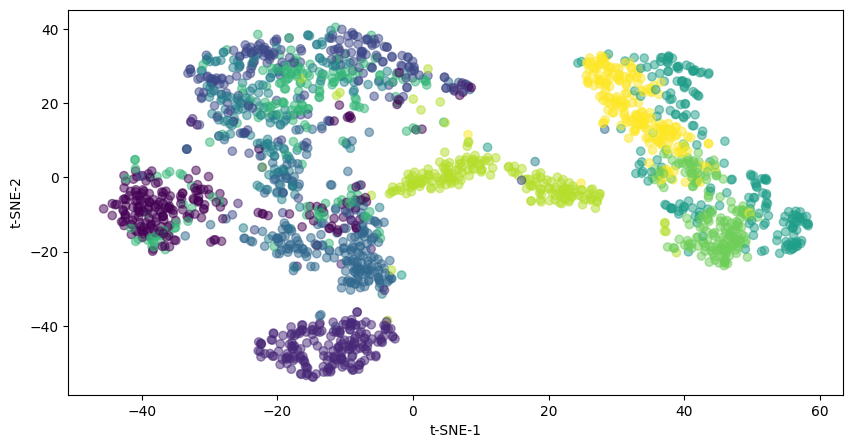

In [5]:
dataset.visualize_dataset()

# Build a model
This example is a model with **fully connected layers.**
> Feel free to experiment with different layers and their parameters to achieve better results.

In [6]:
from lib.model import *
from lib.layers import *
from lib.metrics import *
from lib.optimizers import *
from lib.activations import *


# Create an instance of the Model class
model = Model()

# Add layers to the model
model.add(Layer_Dense(X_train.shape[1], 64))  # INPUT LAYER. Dense layer with input shape and 64 neurons
model.add(Activation_ReLU())  # ReLU activation function
model.add(Layer_Dense(64, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=7e-5))  # Dense layer with regularization
model.add(Activation_ReLU())  # ReLU activation function
model.add(Layer_Dropout(0.2))  # Dropout layer with a dropout rate of 0.2
model.add(Layer_Dense(64, 64))  # Dense layer with 64 neurons
model.add(Activation_ReLU())  # ReLU activation function
model.add(Layer_Dropout(0.2))  # Dropout layer with a dropout rate of 0.2
model.add(Layer_Dense(64, len(dataset.labels)))  # OUTPUT LAYER. Dense layer with the number of output neurons
# model.add(Layer_Dense(64, 1))  # OUTPUT LAYER. For binary classification and regression
model.add(Activation_Softmax())  # Softmax activation function. For multi class
# model.add(Activation_Sigmoid()) # Sigmoind activation for binary classification
# model.add(Activation_Linear()) # Linear activation for regression

# Set the loss function, optimizer, and accuracy metric for the model
model.set(
    loss=Loss_CategoricalCrossentropy(), # Multi class
    # loss=Loss_BinaryCrossentropy(), # Binary
    # loss=Loss_MeanSquaredError(), # Regression
    optimizer=Optimizer_Adam(learning_rate=0.001, decay=0.001),
    accuracy=Accuracy_Categorical(binary=False) # Is binary?
    # accuracy=Accuracy_Regression() For regression
)

# Finalize the model architecture
model.finalize()

# Model training

In [7]:
model.train(
    X_train,
    y_train, 
    validation_data=(X_valid, y_valid), # Or None
    epochs=100, 
    batch_size=128,
    early_stop=5 # When the loss value does not decrease further for X epochs, it stops the training process.
)

Epoch(1/100), Training:   accuracy: 0.613, loss: 0.997, learning rate: 0.000722021660650, data loss: 0.993, regularization loss: 0.004004
Validation: accuracy: 0.754, loss: 0.677 

Epoch(2/100), Training:   accuracy: 0.752, loss: 0.678, learning rate: 0.000564652738566, data loss: 0.673, regularization loss: 0.006006
Validation: accuracy: 0.781, loss: 0.599 

Epoch(3/100), Training:   accuracy: 0.784, loss: 0.603, learning rate: 0.000463606861382, data loss: 0.596, regularization loss: 0.007007
Validation: accuracy: 0.805, loss: 0.543 

Epoch(4/100), Training:   accuracy: 0.805, loss: 0.553, learning rate: 0.000393236335037, data loss: 0.546, regularization loss: 0.007007
Validation: accuracy: 0.817, loss: 0.505 

Epoch(5/100), Training:   accuracy: 0.820, loss: 0.517, learning rate: 0.000341413451690, data loss: 0.509, regularization loss: 0.008008
Validation: accuracy: 0.822, loss: 0.487 

Epoch(6/100), Training:   accuracy: 0.828, loss: 0.494, learning rate: 0.000301659125189, data 

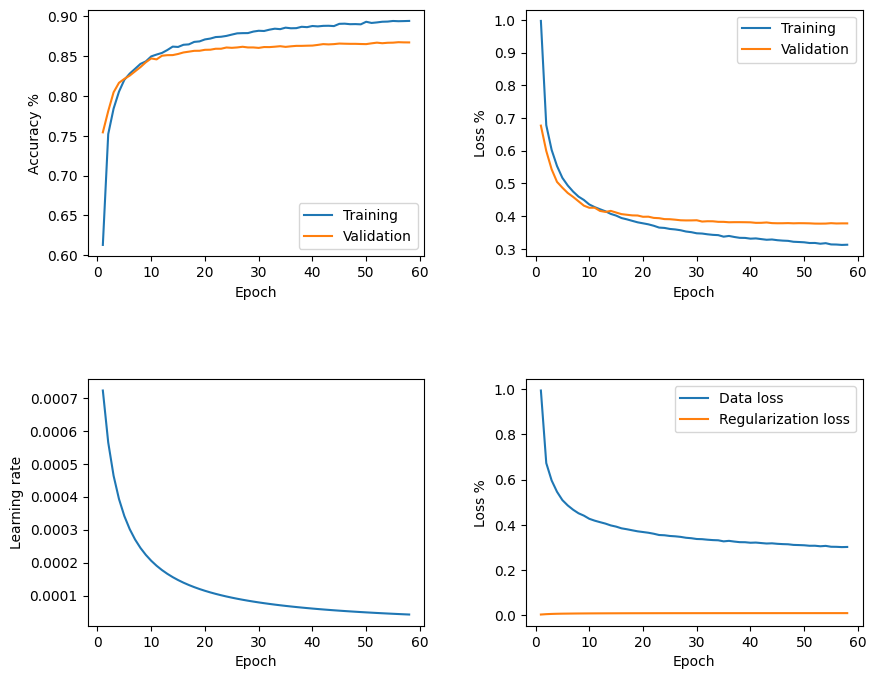

In [8]:
# Visualize the history of the training process
model.visualize_train()

In [9]:
# Test the model performance using the test dataset batch
model.evaluate(X_test, y_test)

Validation: accuracy: 0.872, loss: 0.367 



(0.8723253507156016, 0.3671058889049107)

# Save model
You can save the entire model with the architecture of all layers and their weights, or you can save only the weights and other parameters. Saving only the parameters can be useful in **transfer learning** scenarios or for implementing other visualization tasks.

In [10]:
# Save only parameters
model.save_parameters("params.p")

In [11]:
# Save the whole model and weights too
model.save("model.m")

# Load model
Just as you can save the model using the mentioned methods, you can also load them back.

In [12]:
# You can load weights to an existing model
model.load_parameters("params.p")

In [13]:
# Or you can load a pretrained model with weights
model = Model.load("model.m")

# Predictions

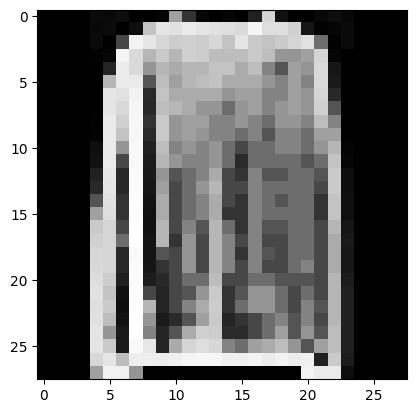

Prediction: Pullover, True: Pullover, Confidence: 77.1%


In [31]:
import random
import matplotlib.pyplot as plt


fashion_mnist_labels = {   
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

img = random.randint(0, len(X_test)-1)  # Random image from test batch

plt.imshow((X_test[img].reshape(28, 28)), cmap='gray')  # Display the image
plt.show()

# Multi class prediction
confidences = model.predict(X_test[img])  # Get the prediction confidence for the image
predictions = model.output_layer_activation.predictions(confidences)  # Convert confidence to predicted class label

prediction = fashion_mnist_labels[predictions[0]]  # Get the predicted label
true_label = fashion_mnist_labels[y_test[img]]  # Get the true label from the test dataset

print(f"Prediction: {prediction}, True: {true_label}, Confidence: {round(max(confidences[0])*100, 2)}%")  # Print the prediction and true label

# Binary prediction
# confidences = model.predict(X_test[img])[0] # Pass image(s) in array
# prediction = 0 if confidences[0] < 0.5 else 1 # Confidence to prediction 
# print(f"Prediction: {fashion_mnist_labels[prediction]}, True: {fashion_mnist_labels[y_test[img][0]]}") # Prediction with labels